In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style = 'ticks', color_codes = True)
iris = sns.load_dataset('iris')

In [48]:
import warnings
warnings.filterwarnings(action='ignore')

In [4]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
# 최빈값
iris.mode()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.0,3.0,1.4,0.2,setosa
1,NaN,NaN,1.5,NaN,versicolor
2,NaN,NaN,NaN,NaN,virginica


In [8]:
iris.groupby('species').describe().T

species                setosa  versicolor  virginica
sepal_length count  50.000000   50.000000  50.000000
             mean    5.006000    5.936000   6.588000
             std     0.352490    0.516171   0.635880
             min     4.300000    4.900000   4.900000
             25%     4.800000    5.600000   6.225000
             50%     5.000000    5.900000   6.500000
             75%     5.200000    6.300000   6.900000
             max     5.800000    7.000000   7.900000
sepal_width  count  50.000000   50.000000  50.000000
             mean    3.428000    2.770000   2.974000
             std     0.379064    0.313798   0.322497
             min     2.300000    2.000000   2.200000
             25%     3.200000    2.525000   2.800000
             50%     3.400000    2.800000   3.000000
             75%     3.675000    3.000000   3.175000
             max     4.400000    3.400000   3.800000
petal_length count  50.000000   50.000000  50.000000
             mean    1.462000    4.260000   5.552000
             std     0.173664    0.469911   0.551895
             min     1.000000    3.000000   4.500000
             25%     1.400000    4.000000   5.100000
             50%     1.500000    4.350000   5.550000
             75%     1.575000    4.600000   5.875000
             max     1.900000    5.100000   6.900000
petal_width  count  50.000000   50.000000  50.000000
             mean    0.246000    1.326000   2.026000
             std     0.105386    0.197753   0.274650
             min     0.100000    1.000000   1.400000
             25%     0.200000    1.200000   1.800000
             50%     0.200000    1.300000   2.000000
             75%     0.300000    1.500000   2.300000
             max     0.600000    1.800000   2.500000

<AxesSubplot:>

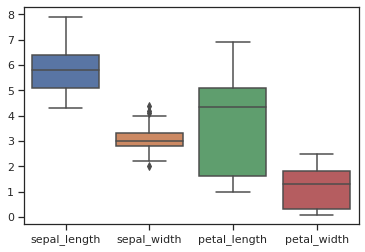

In [9]:
# 종류에 따라 데이터 분포가 차이가 있음
# 다른 데이터와 구분될 수 있음을 확인
sns.boxplot(data=iris)

<AxesSubplot:>

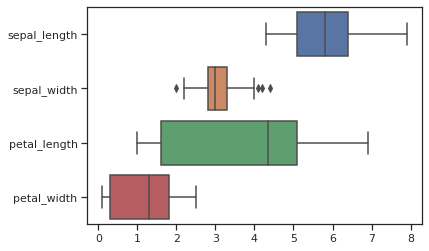

In [10]:
sns.boxplot(data=iris, orient='h')

In [12]:
# outliers
iris[iris['sepal_width'] < 2.5]['sepal_width']

41     2.3
53     2.3
57     2.4
60     2.0
62     2.2
68     2.2
80     2.4
81     2.4
87     2.3
93     2.3
119    2.2
Name: sepal_width, dtype: float64

<AxesSubplot:xlabel='species', ylabel='petal_width'>

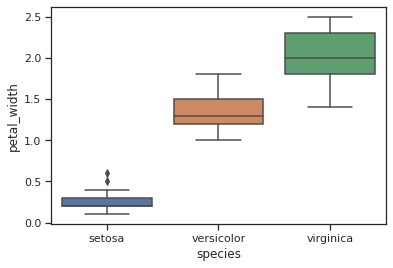

In [14]:
# 종 별로 확인
# 값이 명확히 차이 -> 머신러닝에서 좋은 피처가 되겠구나~ 
sns.boxplot(x='species', y='petal_width', data=iris)

In [15]:
df = iris.copy()   

In [18]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [22]:
df = pd.melt(df, id_vars='species', value_vars=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], var_name ='feature')
df

,species,feature,value
0,setosa,sepal_length,5.1
1,setosa,sepal_length,4.9
2,setosa,sepal_length,4.7
3,setosa,sepal_length,4.6
4,setosa,sepal_length,5.0
...,...,...,...
595,virginica,petal_width,2.3
596,virginica,petal_width,1.9
597,virginica,petal_width,2.0
598,virginica,petal_width,2.3


<AxesSubplot:xlabel='feature', ylabel='value'>

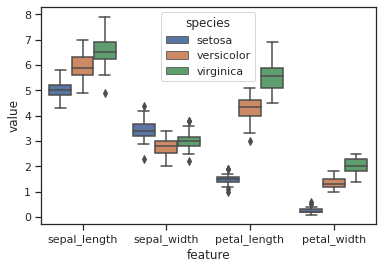

In [26]:
# 종류별로 각 데이터의 차이를 볼 수 있음 
# 전부 다 비슷한 width값은 없는게 더 좋을 수도 있겠음
sns.boxplot(x='feature', y='value', hue='species', data=df)

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/seaborn/axisgrid.py:645: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


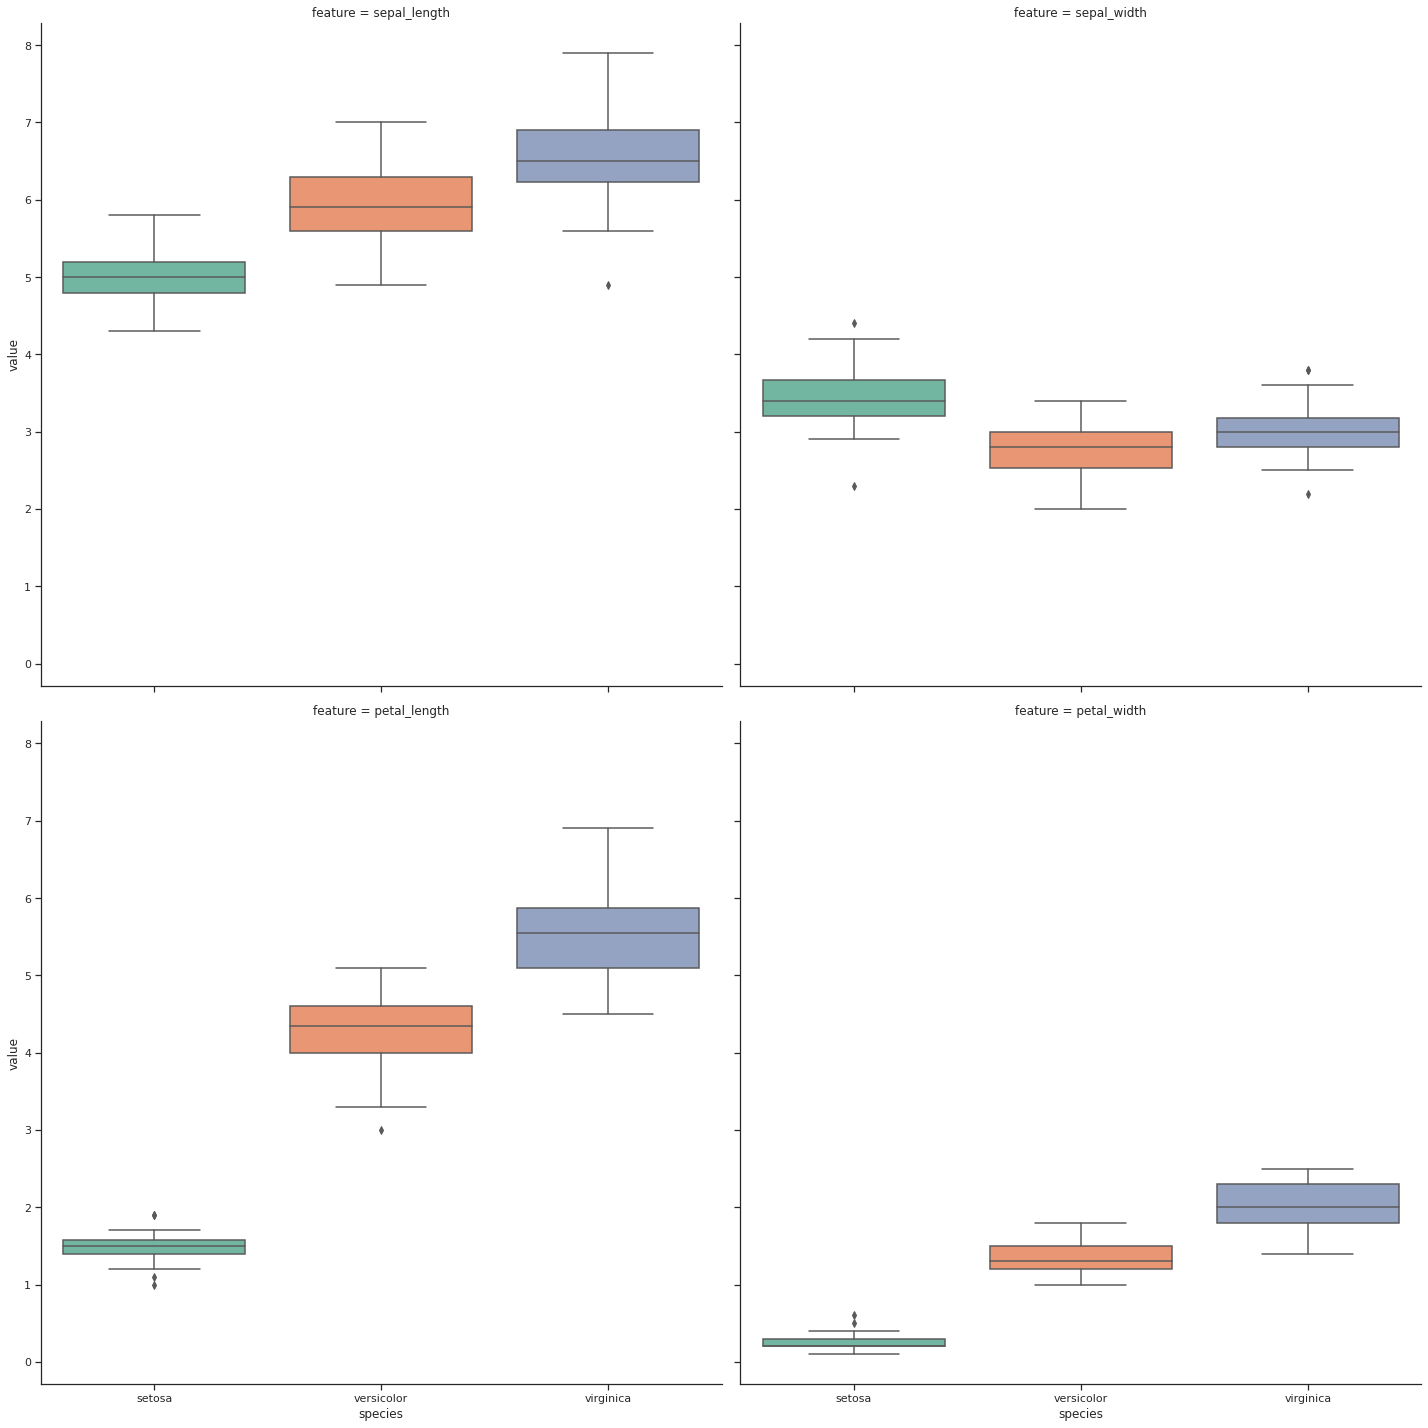

In [27]:
# 여러 피쳐 등을 지정해 그릴 수 있음
g = sns.FacetGrid(
    df, col='feature', col_wrap=2, height=10)
g.map(sns.boxplot, 'species', 'value', palette='Set2')

/home/eunbinpark/miniconda3/envs/da/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sepal_length', ylabel='Density'>

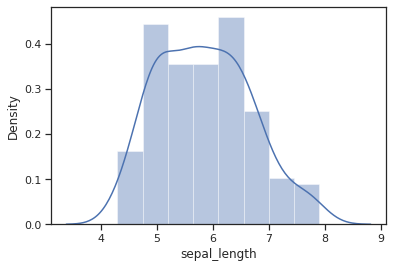

In [28]:
# 왼쪽으로 좀 치우쳐진듯 함
sns.distplot(iris['sepal_length'])

## 도수분포표

In [32]:
min_v = iris['sepal_length'].min()
max_v = iris['sepal_length'].max()

bins = np.linspace(min_v, max_v, 10)
bins

array([4.3, 4.7, 5.1, 5.5, 5.9, 6.3, 6.7, 7.1, 7.5, 7.9])

In [30]:
iris_sepal_len_df = iris[['sepal_length']].copy()
iris_sepal_len_df['bin'] = pd.cut(iris['sepal_length'], 10)

In [31]:
iris_sepal_len_df.groupby('bin').count()

,sepal_length
bin,
"(4.296, 4.66]",9
"(4.66, 5.02]",23
"(5.02, 5.38]",14
"(5.38, 5.74]",27
"(5.74, 6.1]",22
"(6.1, 6.46]",20
"(6.46, 6.82]",18
"(6.82, 7.18]",6
"(7.18, 7.54]",5


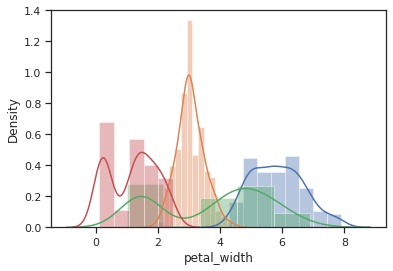

In [49]:
for i in list(iris.columns)[:-1]:
    sns.distplot(iris[i])

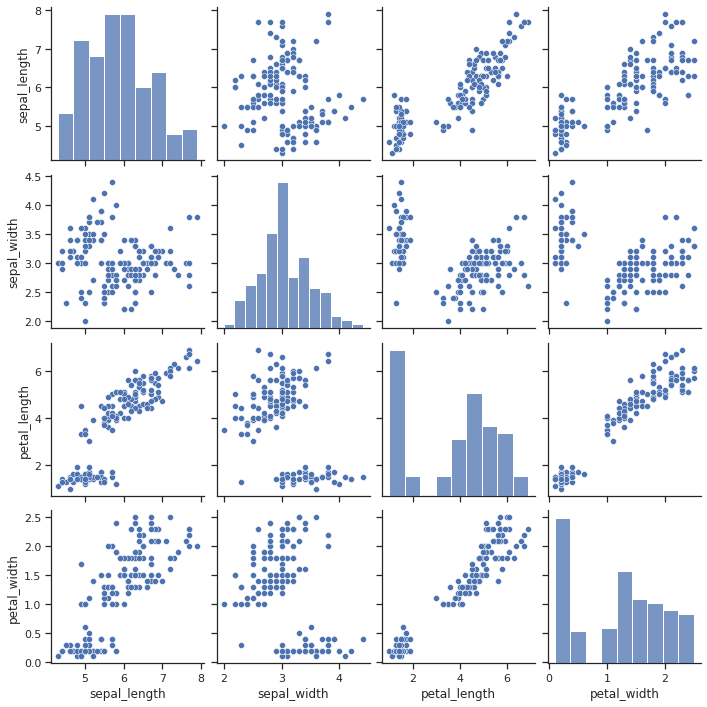

In [46]:
sns.pairplot(iris)

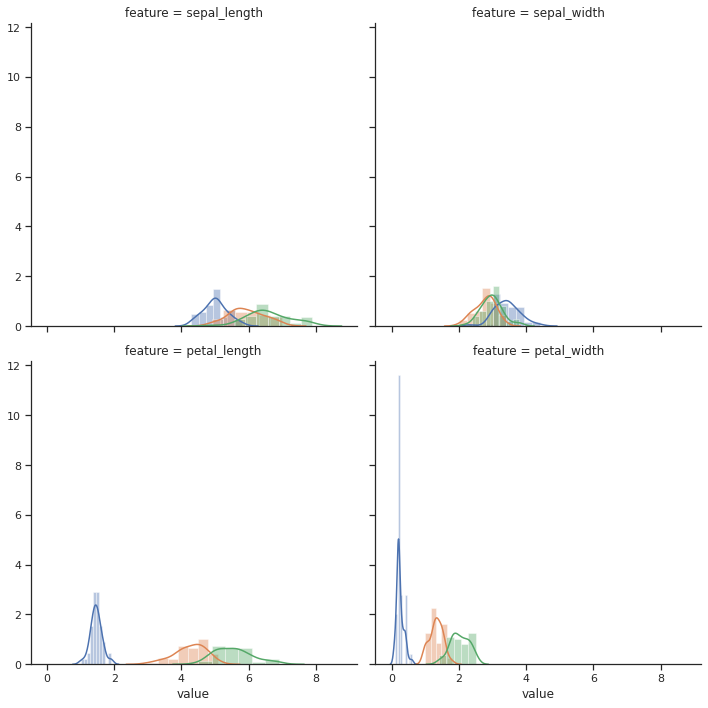

In [50]:
g = sns.FacetGrid(df, col = 'feature', hue='species', height=5, col_wrap=2)
g.map(sns.distplot, 'value') # distplot에 들어갈 파라미터를 나열하면 됨

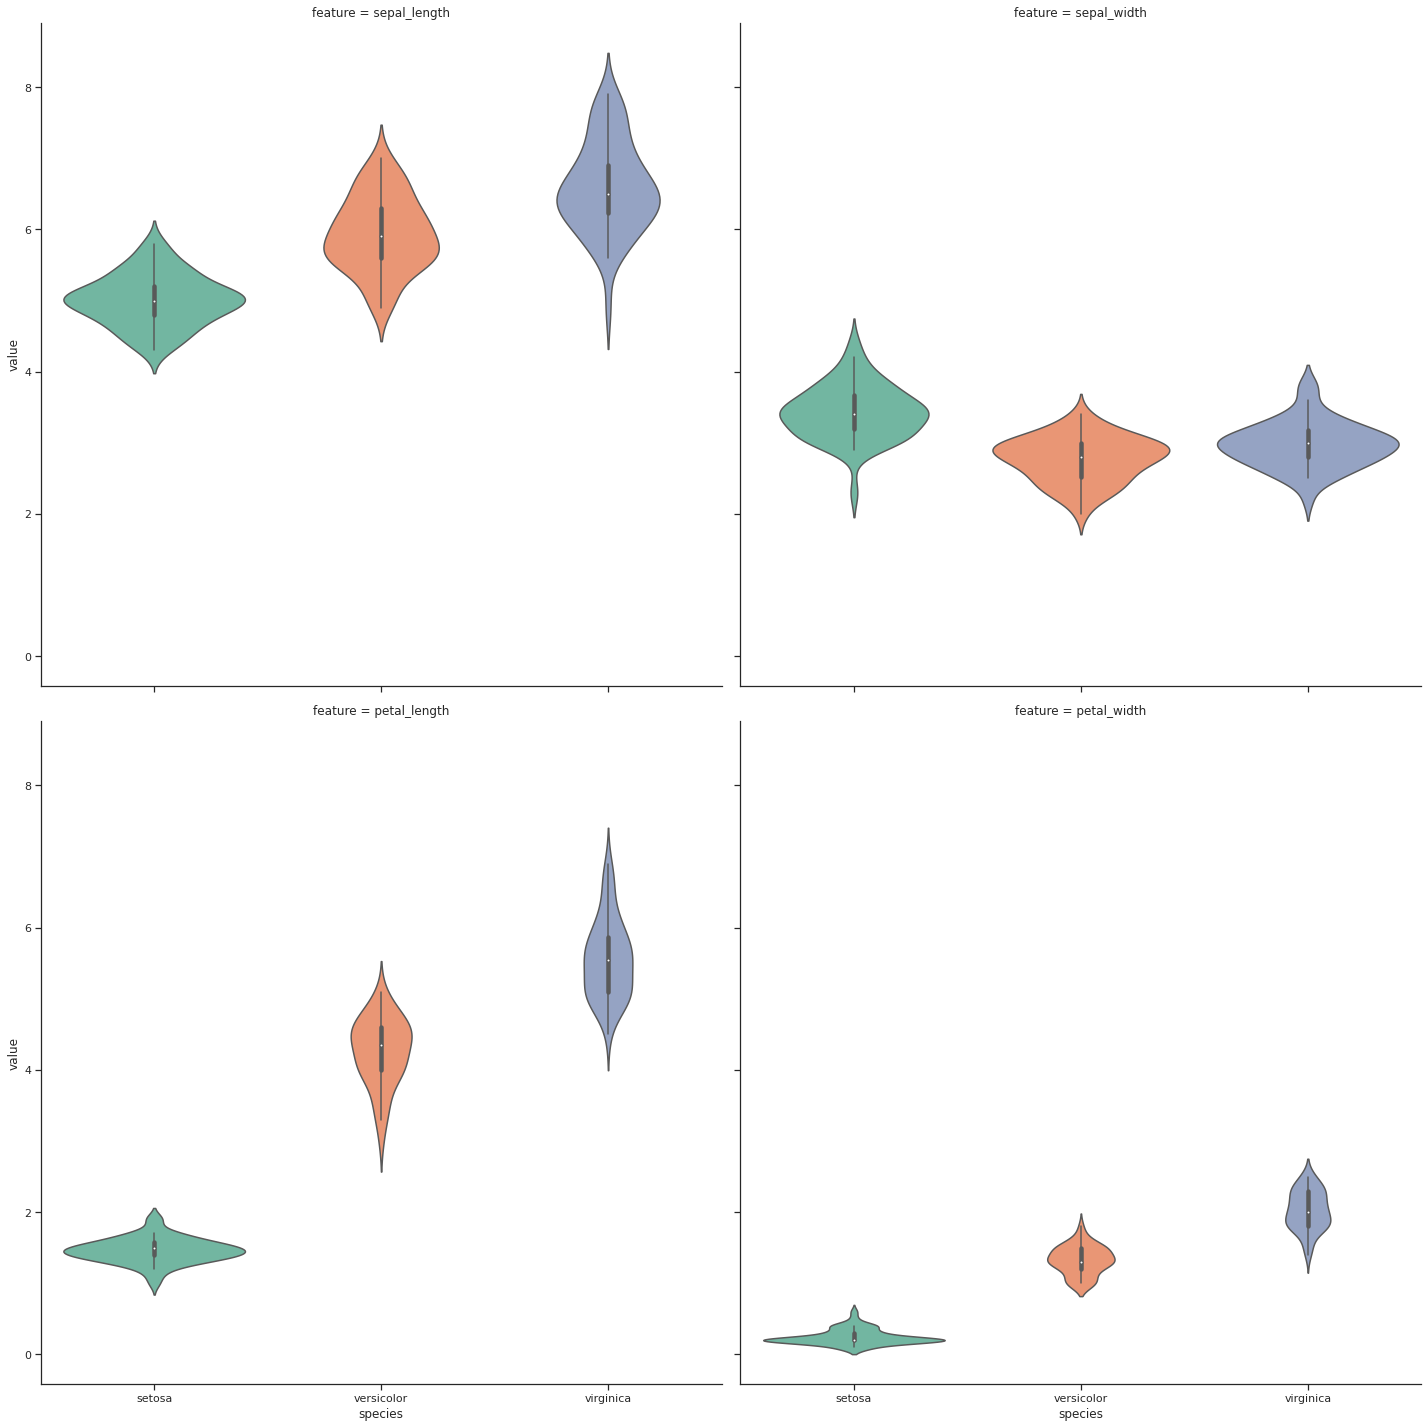

In [51]:
# 데이터의 분포와 함께 boxplot 확인 >
g = sns.FacetGrid(df, col='feature', col_wrap=2, height=10)
g.map(sns.violinplot, 'species', 'value', palette='Set2')

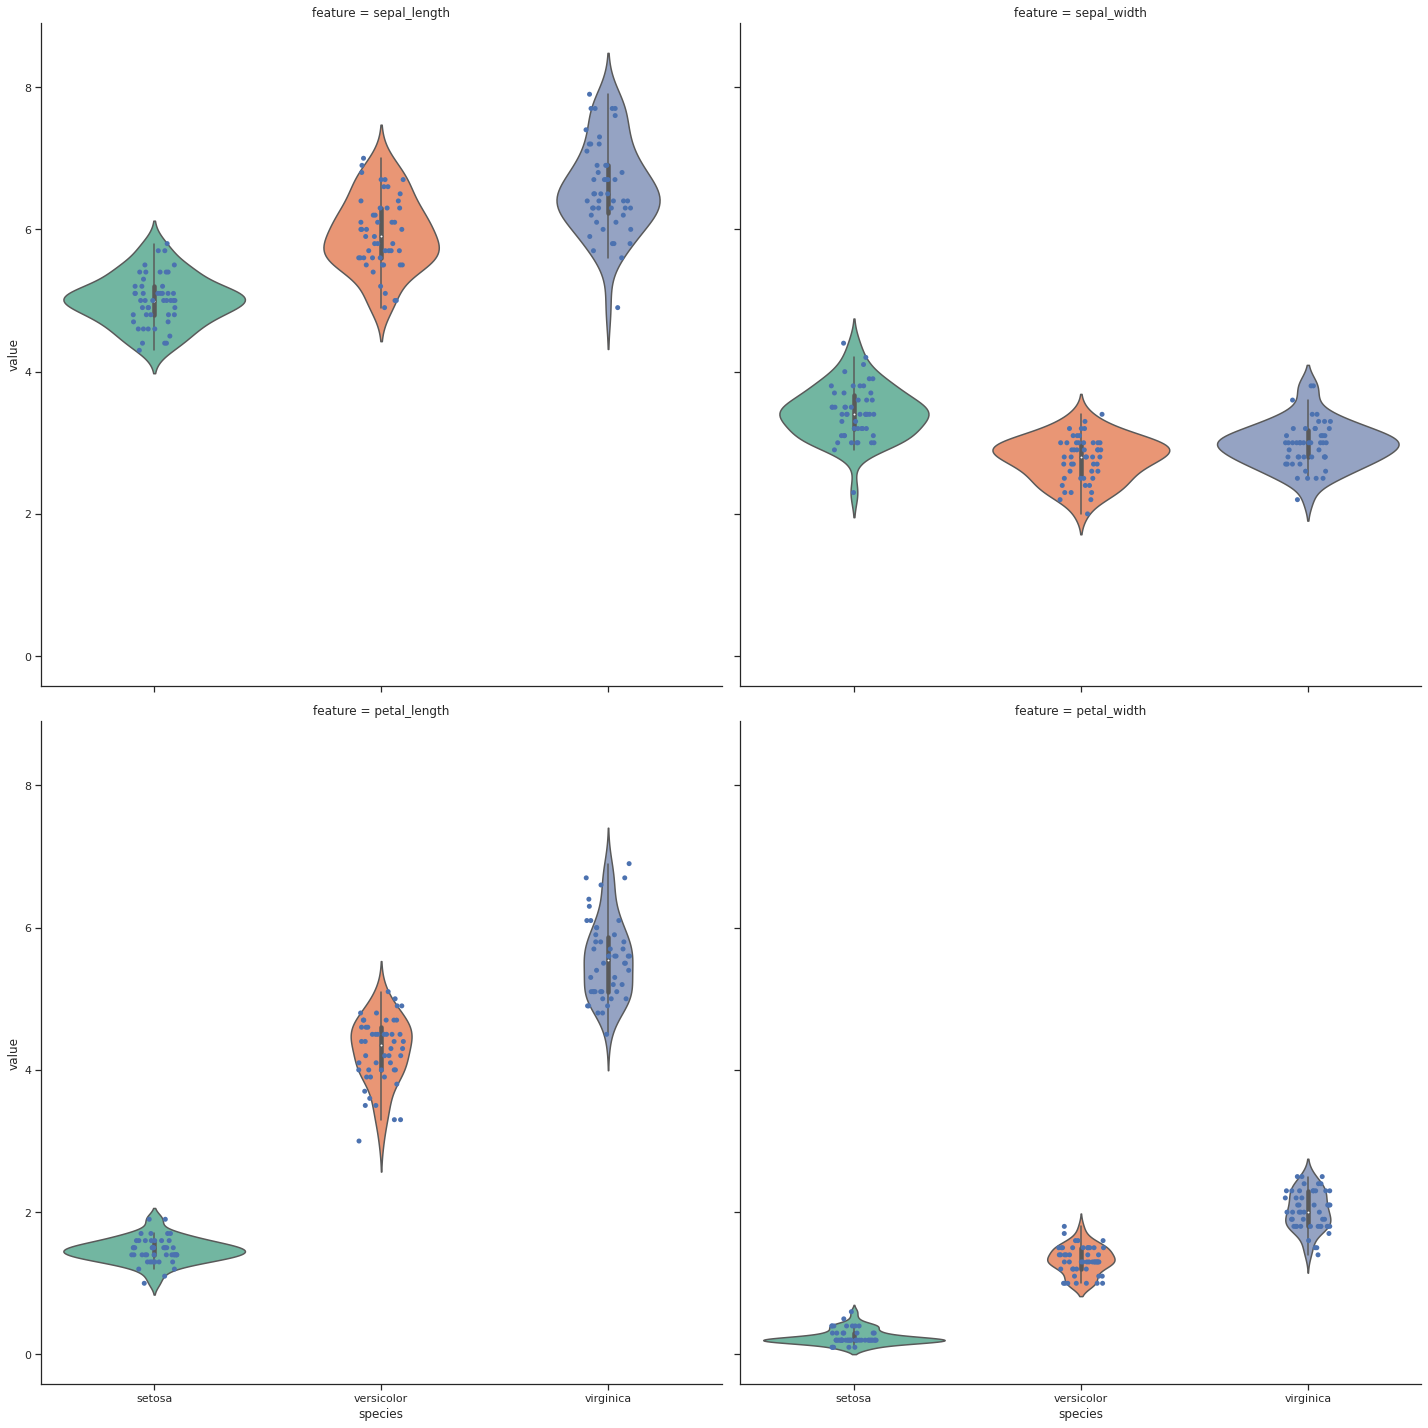

In [53]:
# 데이터 퍼지는 모습까지 볼 수 있음
g = sns.FacetGrid(df, col='feature', col_wrap=2, height=10)
g.map(sns.violinplot, 'species', 'value', palette='Set2')
g.map(sns.stripplot, 'species', 'value')